# Autoencoders

## Introduction

* It uses unsupervised learning methods.

* Used for dimensionality reduction and noise removal from images.

* The use case is actually semi-supervised.

* It is a very simple neural network and is similar to multi-layer perceptron model.

* Designed to reproduce its input at the output layer.

* In autoencoders, **n(input neurons) = n(output neurons)**

## Working

* For the input to be produced as output at the final layerm the hidden layer must learn what features are       important.

* Consider 5 -> 2 -> 5 as the number of neurons in layers of the NN.

* When going from 5 -> 2, a design of 5 dimensions is reduced to 2 dimensions, then expanded back to 5 when       going from 5 -> 2.

* The hidden representation attempts to maintain the important input information.

**The main idea is that center hidden layer reduces the dimensionality to learn the most important combinations of original features.**

## Use Cases

* Compressing data

* Visualizing data in lower dimensions

# A Simple Illustration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [2]:
data = make_blobs(
    n_samples=300, # Number of rows
    n_features=2, # Number of features
    centers=2, # Number of clusters
    cluster_std=1.0, # Noise
    random_state=101
)

In [3]:
X, y = data

In [4]:
X[0:4]

array([[-8.87772115, -6.76007802],
       [ 0.630638  ,  3.10707466],
       [-0.24060881,  2.82068999],
       [-7.83909113, -8.20754485]])

In [5]:
y[0:4]

array([1, 0, 0, 1])

In [6]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [7]:
z_noise[0:4]

0    2.706850
1    0.628133
2    0.907969
3    0.503826
dtype: float64

In [8]:
feat = pd.DataFrame(X)
feat.head()

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676


In [9]:
feat = pd.concat([feat, z_noise], axis=1)

In [10]:
feat.columns = ['X1', 'X2', 'X3']
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


<AxesSubplot:xlabel='X1', ylabel='X2'>

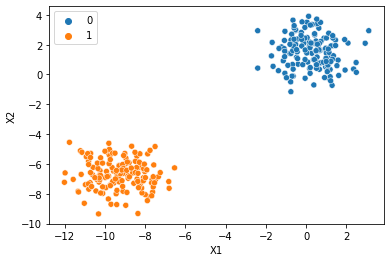

In [11]:
sbn.scatterplot(data=feat, x='X1', y='X2', hue=y)

In [12]:
from mpl_toolkits.mplot3d import Axes3D

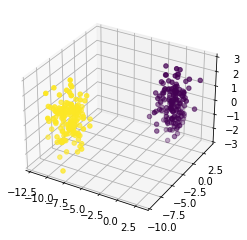

In [13]:
# %matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'], feat['X2'], feat['X3'], c=y)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [15]:
# 3 --> 2 --> 3

encoder = Sequential()
encoder.add(Dense(units=2, activation='relu', input_shape=[3]))

In [16]:
decoder = Sequential()
decoder.add(Dense(units=3, activation='relu', input_shape=[2]))

In [17]:
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(SGD(learning_rate=1.5), 'mse')

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [19]:
autoencoder.fit(scaled_data, scaled_data, epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 1ms/step - loss: 0.1770
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1421
Epoch 3/5
10/10 [==============================] - 0s 4ms/step - loss: 0.1368
Epoch 4/5
10/10 [==============================] - 0s 3ms/step - loss: 0.1440
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1414


In [20]:
encoded_2dim = encoder.predict(scaled_data)

print(encoded_2dim.shape)

print(scaled_data.shape)

(300, 2)
(300, 3)


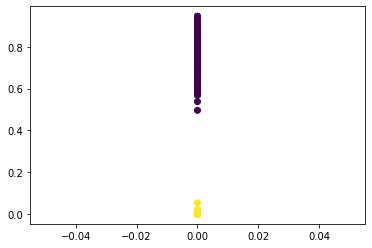

In [21]:
plt.scatter(encoded_2dim[:, 0], encoded_2dim[:, 1], c=y)